## Ejercicio 1

Following the example from the course (where a python snippet of code is used to map
and display polygons through homographies), write a python script to illustrate the eect of
homographies on ellipses.

---

Para resolver este ejercicio generamos dos funciones, una para generar la elipse y otra para aplicar la transformación homogenea. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ellipse(center, axes, angle, num_points=100):
    t = np.linspace(0, 2*np.pi, num_points)
    ellipse = np.array([axes[0]*np.cos(t), axes[1]*np.sin(t)])
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotated_ellipse = np.dot(rotation_matrix, ellipse)
    return rotated_ellipse + np.array(center).reshape(2, 1)

def apply_homography(H, points):
    points_homogeneous = np.vstack((points, np.ones((1, points.shape[1]))))
    transformed_points_homogeneous = np.dot(H, points_homogeneous)
    return transformed_points_homogeneous[:2] / transformed_points_homogeneous[2]

In [4]:
# Definir elipse original
center = (0, 0)
axes = (2, 1)  # Semiejes mayor y menor
angle = np.pi/4  # Angulo de rotación en radianes

# Generar puntos de la elipse
ellipse_points = generate_ellipse(center, axes, angle)

# Definir una matriz de homografía
H = np.array([[1, 0.5, 0],
              [0.5, 1, 0],
              [0, 0, 1]])

# Aplicar la homografía a los puntos de la elipse
transformed_ellipse_points = apply_homography(H, ellipse_points)

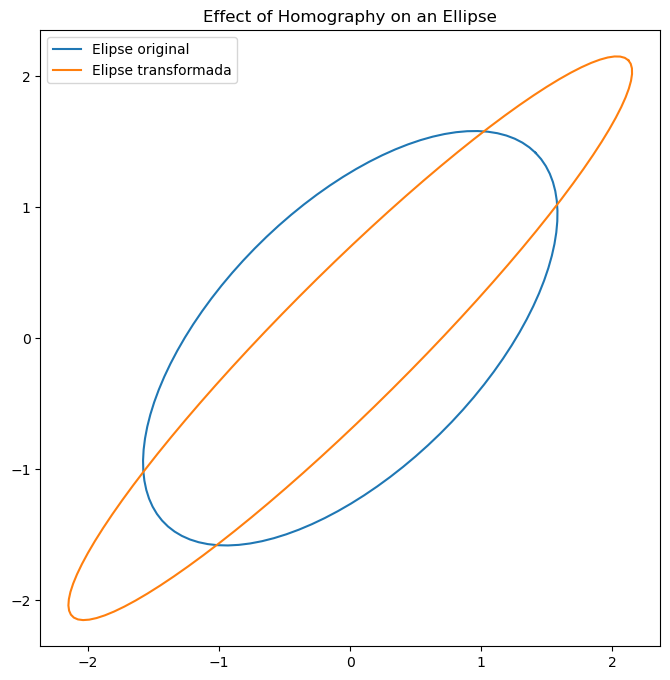

In [6]:
# Graficar
plt.figure(figsize=(8, 8))
plt.plot(ellipse_points[0], ellipse_points[1], label='Elipse original')
plt.plot(transformed_ellipse_points[0], transformed_ellipse_points[1], label='Elipse transformada')
plt.axis('equal')
plt.legend()
plt.title('Effect of Homography on an Ellipse')
plt.show()

## Ejercicio 3.2

Calculo de tamaño de pixel de la cámara

In [7]:
import math

# Datos
fov_horizontal_grados = 5.1  # Campo de visión horizontal en grados
distancia_objeto_mm = 2000  # Distancia al objeto en milímetros (2 metros)
anchura_imagen_pixeles = 1200  # Anchura de la imagen en píxeles

# Convertir el campo de visión horizontal de grados a radianes
fov_horizontal_radianes = math.radians(fov_horizontal_grados)

# Calcular el tamaño del detalle en el objeto por píxel
tamaño_detalle_objeto_mm_por_px = math.tan(fov_horizontal_radianes / 2) * (distancia_objeto_mm / anchura_imagen_pixeles)

print(f"Tamaño del detalle en el objeto por píxel: {tamaño_detalle_objeto_mm_por_px:.2f} mm/px")


Tamaño del detalle en el objeto por píxel: 0.07 mm/px


## Ejercicio 3.4

Cálculo de tamaño de roca en pixeles

In [8]:
# Tamaño angular de la roca
tamaño_angular_roca_grados = 14.25 

# Campo de visión de la cámara y resolución
fov_camara_grados = 5.1  # FoV de la cámara con la lente de 100 mm
resolucion_dim_px = 1200  # Resolución en una dimensión en píxeles

# Calcular el tamaño de la imagen de la roca en píxeles
tamaño_imagen_roca_px = (tamaño_angular_roca_grados / fov_camara_grados) * resolucion_dim_px

print(f"El tamaño de la imagen de la roca en píxeles es aproximadamente: {tamaño_imagen_roca_px:.2f} píxeles")


El tamaño de la imagen de la roca en píxeles es aproximadamente: 3352.94 píxeles
